In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas as gpd
 
from weave_units import WeaveUnit
from tile_map import Tiling

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [2]:
ak = gpd.read_file("../data/imd-auckland-2018.gpkg")

## Biaxial weave

<AxesSubplot:>

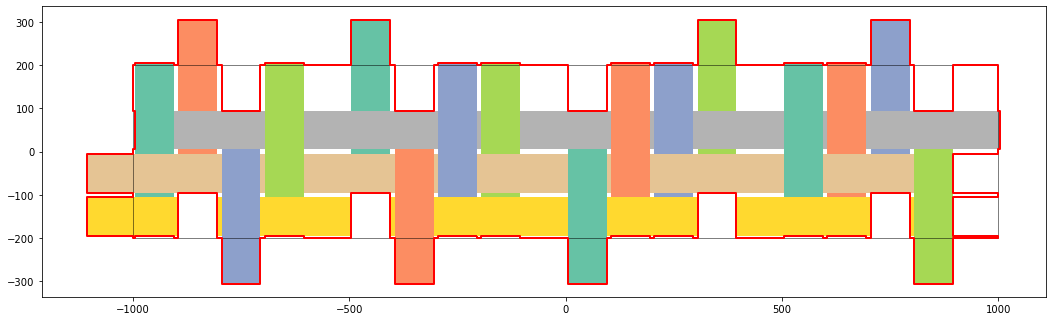

In [3]:
w1 = WeaveUnit(weave_type = "twill", n = 2, spacing = 100, aspect = 0.9,
                    margin = 0., strands = "abcd-|efg-", crs = ak.crs)
w1.plot(r = 0, cmap = "Set2", figsize = (18, 6), show_ids = False)

In [4]:
weave1 = Tiling(w1, ak, id_var = "DZ2018")

In [5]:
textile1 = weave1.get_tiled_map(rotation = 20, prioritise_tiles = True)

In [6]:
textile1.variables = [x for x in ak.columns if "Rank" in x]
textile1.colourmaps = dict(zip(textile1.variables,
                               ("BrBG", "RdGy", "RdYlBu", "Spectral","PiYG", "PRGn", "PuOr")))

fig=<Figure size 1440x1080 with 2 Axes>
Only a list of variables specified, assigning to available element_ids.


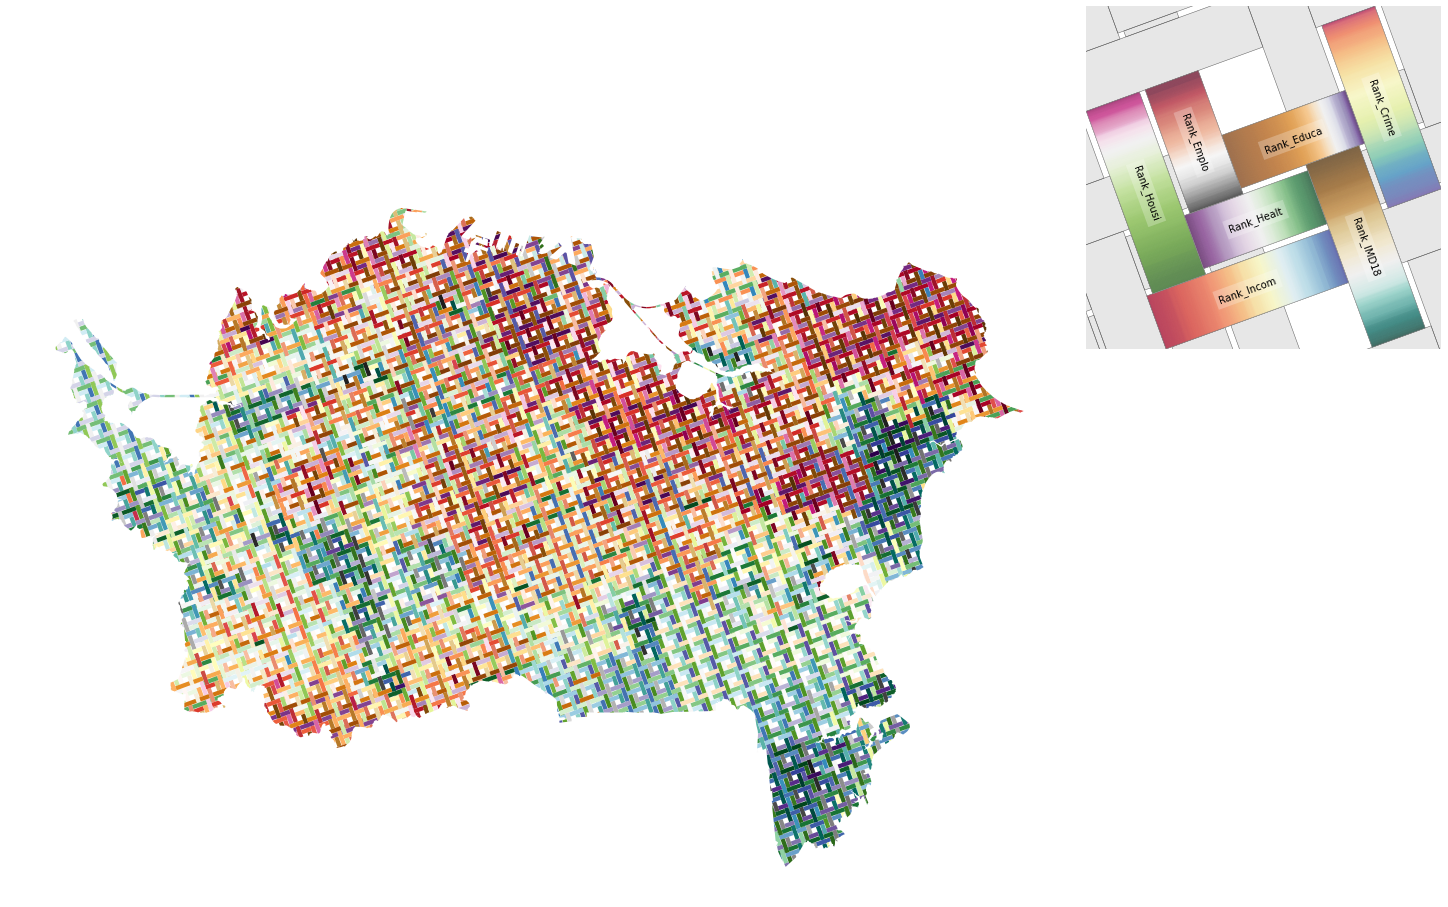

In [7]:
fig = textile1.render()

## Triaxial weave

<AxesSubplot:>

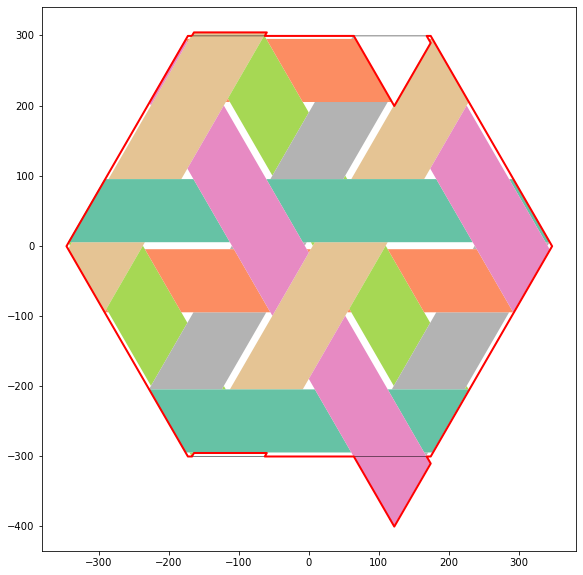

In [8]:
w2 = WeaveUnit(weave_type = "cube", spacing = 100, aspect = 0.9,
                    margin = .0, strands = "a-c|d-f|g-i", crs = ak.crs)
w2.plot(r = 0, cmap = "Set2", figsize = (10, 10), show_ids = False)

In [9]:
weave2 = Tiling(w2, ak, id_var = "DZ2018")

In [10]:
textile2 = weave2.get_tiled_map(rotation = 20, prioritise_tiles = True)

In [11]:
textile2.variables = dict(zip(list("acdfgi"),
                              [x for x in ak if "Rank" in x]))
textile2.colourmaps = dict(zip(textile2.variables.values(),
                               ("BrBG", "RdGy", "RdYlBu", "Spectral",
                                "PiYG", "PRGn", "PuOr", "viridis")))

fig=<Figure size 1440x1080 with 2 Axes>


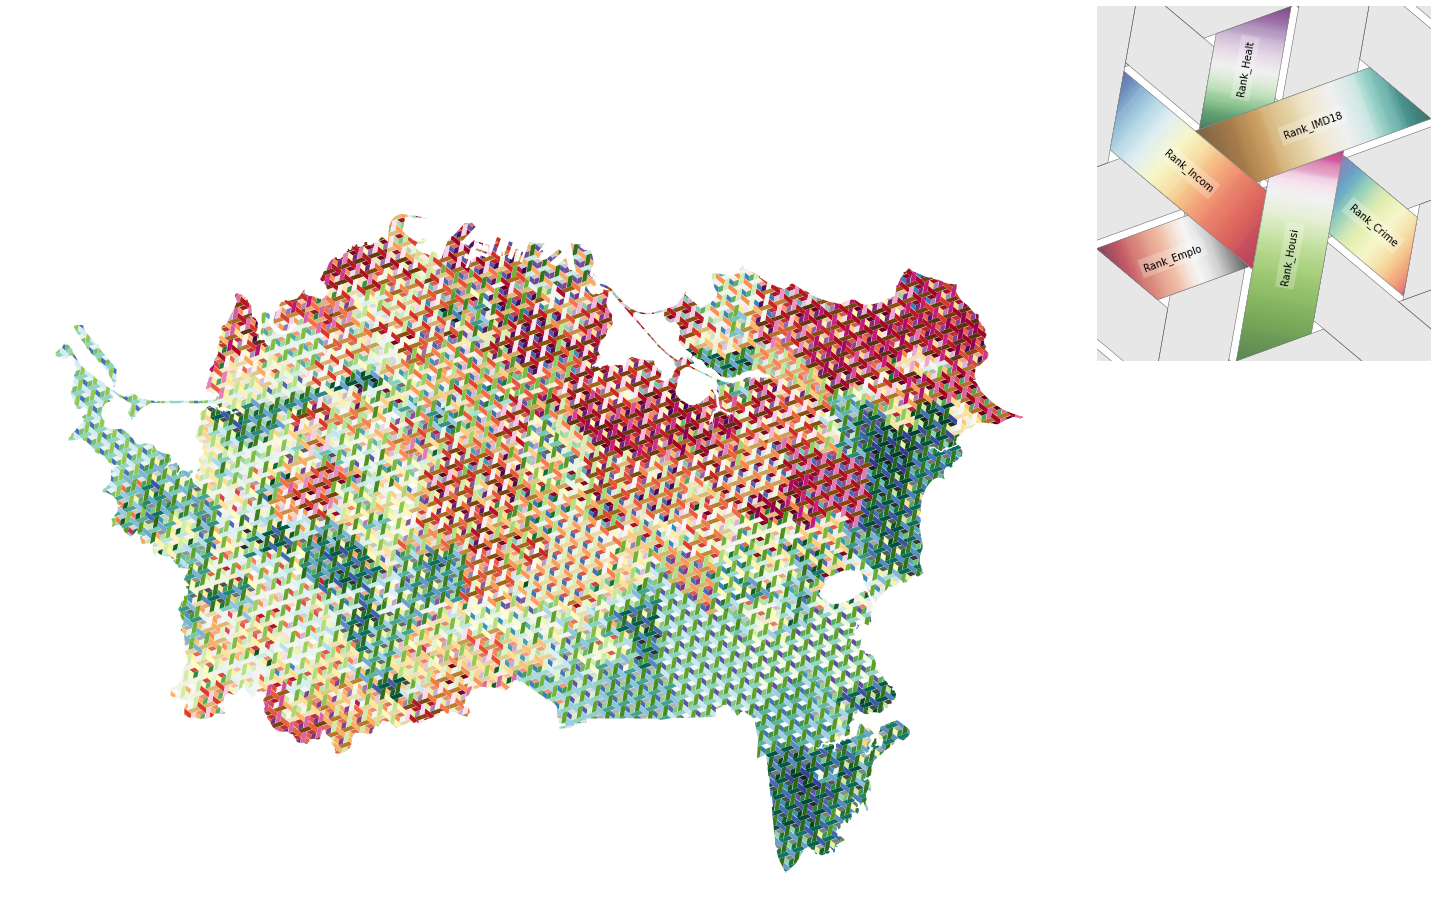

In [12]:
fig = textile2.render()